Unsupervised Learning is a type of machine learning where the model works without labelled data.

It learns patterns on its own by grouping similar data points or finding hidden structures without any human intervention.

Types:
  1. Clustering
  2. Dimensionality Reduction

Steps:
  1. Collect Unlabeled Data
  2. Select an Algorithm
  3. Train the Model on Raw Data
  4. Group or Transform Data
  5. Interpret and Use Results

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Clustering Algorithms

An unsupervised ML technique that groups unlabeled data into clusters based on similarity.

Its goal is to discover patterns or relationships within the data without any prior knowledge of categories or labels.

    Groups data points that share similar features or characteristics.
    Helps find natural groupings in raw, unclassified data.
    Commonly used for customer segmentation, anomaly detection and data organization.
    Works purely from the input data without any output labels.
    Enables understanding of data structure for further analysis or decision-making.

In [134]:
from sklearn.datasets import make_blobs

# create a synthetic dataset using make_blobs
# generates 500 data points in a 2D space, grouped into 3 clusters.
X, y = make_blobs(n_samples=500, n_features = 2, centers = 3, random_state = 23)

In [135]:
# the coordinates (x,y) of the first point
X[0][0], X[0][1]

(np.float64(-4.969386566164007), np.float64(3.5372400465454183))

In [136]:
# the cluster of the first point
y[0]

np.int64(2)

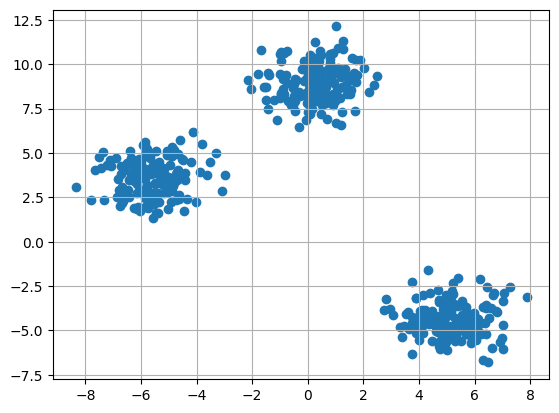

In [137]:
# plot
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

K means Clustering

Groups similar data points into clusters without needing labeled data.

It is used to uncover hidden patterns when the goal is to organize data based on similarity.

In [138]:
from sklearn.cluster import KMeans

k_means = KMeans(3, init = "random")
predicted_k_means = k_means.fit_predict(X)

Hierarchical Clustering

Groups data into a hierarchy of clusters based on similarity.

It builds a tree‑like structure (dendrogram) that helps visualize relationships and decide the optimal number of clusters.

In [139]:
from scipy.cluster.hierarchy import linkage, dendrogram

hierarchical_clusters = linkage(X, method = "complete", metric = "euclidean")

DBSCAN Clustering in ML

Density-based clustering algorithm that groups data points that are closely packed together and marks outliers as noise based on their density in the feature space.

It identifies clusters as dense regions in the data space separated by areas of lower density.

Unlike K-Means or hierarchical clustering which assumes clusters are compact and spherical, DBSCAN perform well in handling real-world data irregularities.

In [140]:
from sklearn.cluster import DBSCAN

# eps : The radius to look for neighboring points
# min_samples: Minimum number of points required to form a dense region a cluster
# labels: Cluster numbers for each point. -1 means the point is considered noise.
db = DBSCAN(eps = 0.8, min_samples = 5, metric = "euclidean").fit(X)
labels = db.labels_
set(labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [141]:
len(labels)

500

In [142]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 9


In [143]:
# Indices of core samples
db.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,
        28,  29,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  46,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 131, 133, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [144]:
# Core samples (large dots) and non-core samples (small dots) are color-coded according to the assigned cluster.
# Samples tagged as noise are represented in black.
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask


array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

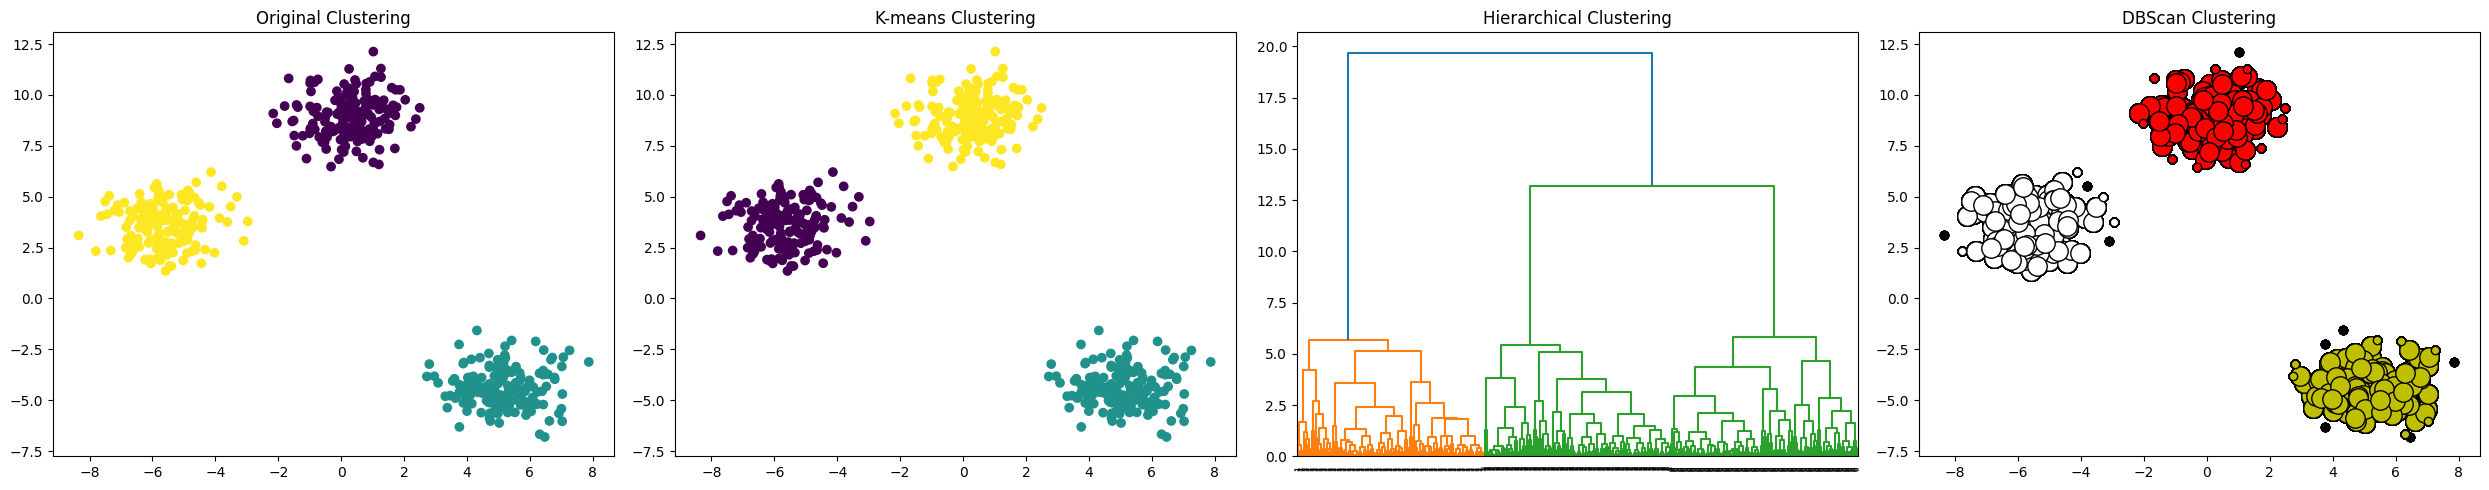

In [145]:
# Plot the results
plt.figure(figsize=(25, 5))

plt.subplot(1, 4, 1)
# Original, generated clusters
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title('Original Clustering')

plt.subplot(1, 4, 2)
# K-means clusters
plt.scatter(X[:, 0], X[:, 1], c = predicted_k_means)
plt.title('K-means Clustering')

plt.subplot(1, 4, 3)
#hieararchical clusters
dendrogram(hierarchical_clusters, labels = y)
plt.title('Hierarchical Clustering')

plt.subplot(1, 4, 4)
#DBScan clusters
colors = ['k', 'w', 'y', 'r']
for k in labels:
    col = colors[k + 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    plt.title('DBScan Clustering')

plt.tight_layout()
plt.show()

## Dimensionality Reduction Algorithms

The process of decreasing the number of features or variables in a dataset while retaining as much of the original information as possible.

This technique helps simplify complex data making it easier to analyze and visualize.

It also improves the efficiency and performance of machine learning algorithms by reducing noise and computational cost.

    It reduces the dataset’s feature space from many dimensions to fewer, more meaningful ones.
    Helps focus on the most important traits or patterns in the data.
    Commonly used to improve model speed and reduce overfitting.

In [146]:
# small dataset with three features Height, Weight, Age and Gender
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'BMI': [1, 0, 1, 2, 0, 2, 0, 1, 0, 2]  # 1 = Underweight, 0 = Healthy, 2 - Overweight
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  BMI
0     170      65   30    1
1     165      59   25    0
2     180      75   35    1
3     175      68   28    2
4     160      55   22    0
5     172      70   32    2
6     168      62   27    0
7     177      74   33    1
8     162      58   24    0
9     158      54   21    2


In [147]:
# the features have different scales Height vs Age
# standardize the data - make all features have mean = 0 and standard deviation = 1 so that no feature dominates just because of its units
X = df.drop('BMI', axis=1)
y = df['BMI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.18419807,  0.13867505,  0.50910379],
       [-0.52425605, -0.69337525, -0.59764358],
       [ 1.60110632,  1.52542554,  1.61585117],
       [ 0.8926522 ,  0.5547002 ,  0.06640484],
       [-1.23271018, -1.24807544, -1.26169201],
       [ 0.46757972,  0.83205029,  0.95180275],
       [-0.09918358, -0.2773501 , -0.15494463],
       [ 1.17603385,  1.38675049,  1.17315222],
       [-0.94932853, -0.83205029, -0.81899306],
       [-1.51609183, -1.38675049, -1.48304149]])

Linear Discriminant Analysis /LDA/

Supervised classification problem that helps separate two or more classes by converting higher-dimensional data space into a lower-dimensional space.

It is used to identify a linear combination of features that best separates classes within a dataset.

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#LinearDiscriminantAnalysis(n_components=2) reduces features to 2 components
lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [149]:
# train a logistic regression model on the reduced training data and predict gender labels on the test set
model_lda = LogisticRegression()
model_lda.fit(X_train_lda, y_train)

y_pred_lda = model_lda.predict(X_test_lda)

In [150]:
X_train[:, 0], X_train[:, 1]

(array([ 0.46757972,  0.18419807,  1.17603385,  1.60110632, -1.51609183,
        -1.23271018,  0.8926522 , -0.09918358]),
 array([ 0.83205029,  0.13867505,  1.38675049,  1.52542554, -1.38675049,
        -1.24807544,  0.5547002 , -0.2773501 ]))

In [151]:
X_train_lda[:, 0], X_train_lda[:, 1]

(array([ 0.90755248,  0.67948447,  0.86037856,  1.59829607, -1.81349562,
        -1.50398439, -0.5065978 , -0.22163378]),
 array([ 0.75585555, -1.48610921,  1.51322052, -0.3931884 ,  0.40645963,
        -0.30237777,  0.62048645, -1.11434677]))

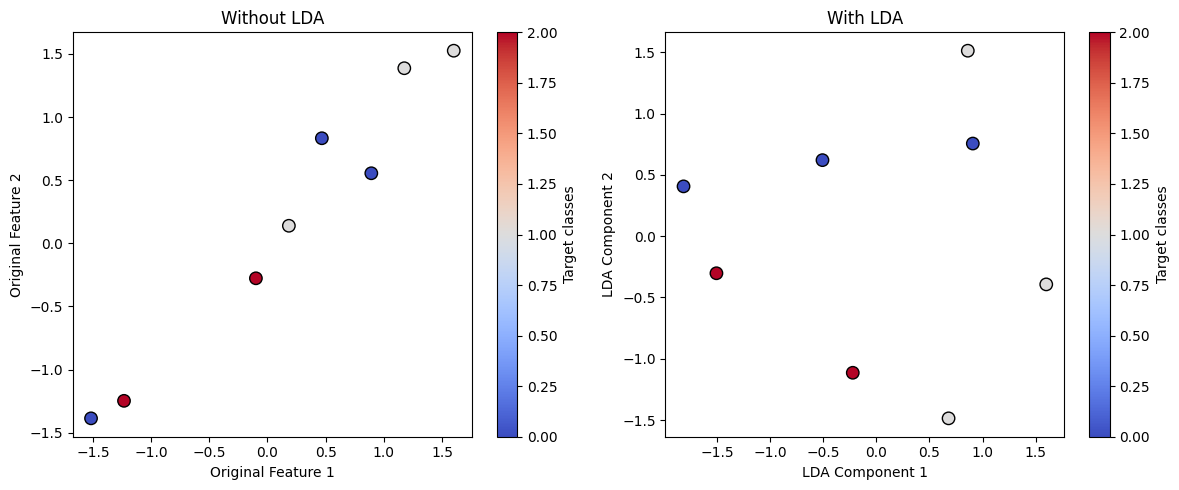

In [152]:
# Visualizing LDA Result
y_numeric = pd.factorize(y_train)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Without LDA')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('With LDA')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

Principal Component Analysis /PCA/

A dimensionality reduction technique and helps us to reduce the number of features in a dataset while keeping the most important information.

It changes complex datasets by transforming correlated features into a smaller set of uncorrelated components.

In [153]:
from sklearn.decomposition import PCA

# reduce the data from 3 features to 2 new features called principal components.
# these components capture most of the original information but in fewer dimensions.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# train a logistic regression model on the reduced training data and predict gender labels on the test set
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [154]:
X_pca

array([[ 0.47934953,  0.24005867],
       [-1.04854122, -0.0462082 ],
       [ 2.73763841,  0.01704297],
       [ 0.87462551, -0.58608547],
       [-2.16068418, -0.02240454],
       [ 1.30013241,  0.33690873],
       [-0.30743041, -0.03219976],
       [ 2.15777883, -0.01054754],
       [-1.50115252,  0.08802759],
       [-2.53171635,  0.01540757]])

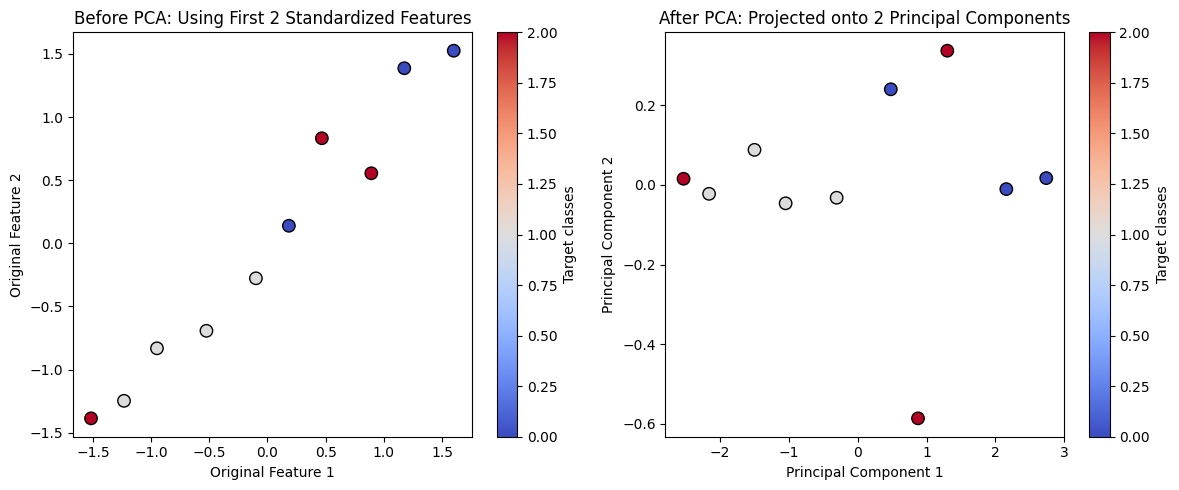

In [155]:
# Visualizing PCA Result
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()